# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
city = 'chicago'


city_url = f"{url}units={units}&appid={weather_api_key}&q={city}"

city_url_response = requests.get(city_url).json()

print(json.dumps(city_url_response, indent=4, sort_keys=True))

print(city_url_response['coord']['lat'])

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 41.85,
        "lon": -87.65
    },
    "dt": 1670100583,
    "id": 4887398,
    "main": {
        "feels_like": -5.83,
        "humidity": 40,
        "pressure": 1030,
        "temp": -0.04,
        "temp_max": 0.58,
        "temp_min": -1.33
    },
    "name": "Chicago",
    "sys": {
        "country": "US",
        "id": 2005153,
        "sunrise": 1670072454,
        "sunset": 1670106021,
        "type": 2
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "gust": 10.29,
        "speed": 6.69
    }
}
41.85


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units={units}&appid={weather_api_key}&q={city}"    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        time.sleep(2)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | floro
Processing Record 3 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 1 | namatanai
Processing Record 5 of Set 1 | saint-augustin
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | marsabit
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | itarema
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | magistralnyy
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | cururupu
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | coihaique
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | benavente
Pr

Processing Record 36 of Set 4 | cabedelo
Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | te anau
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | moerai
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | lemesos
City not found. Skipping...
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | okitipupa
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | eldikan
City not found. Skipping...
Processing Record 47 of Set 4 | yantal
Processing Record 48 of Set 4 | malwan
City not found. Skipping...
Processing Record 49 of Set 4 | sioux lookout
Processing Record 0 of Set 5 | victoria
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | rabo de peixe
Processing Record 3 of Set 5 | awbari
Processing Record 4 of Set 5 | haibowan
City not found. Skipping...
Processing Record 5 of Set 5 | makakilo city
Processing Record 6 of Set 5 | tidor

Processing Record 24 of Set 8 | kachiry
Processing Record 25 of Set 8 | sicamous
Processing Record 26 of Set 8 | amderma
City not found. Skipping...
Processing Record 27 of Set 8 | puerto escondido
Processing Record 28 of Set 8 | plettenberg bay
Processing Record 29 of Set 8 | allonnes
Processing Record 30 of Set 8 | sola
Processing Record 31 of Set 8 | grand gaube
Processing Record 32 of Set 8 | roma
Processing Record 33 of Set 8 | kalemie
Processing Record 34 of Set 8 | palmer
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | nelson bay
Processing Record 37 of Set 8 | adrar
Processing Record 38 of Set 8 | san policarpo
Processing Record 39 of Set 8 | bairiki
Processing Record 40 of Set 8 | balkanabat
Processing Record 41 of Set 8 | ratnagiri
Processing Record 42 of Set 8 | visby
Processing Record 43 of Set 8 | angoche
Processing Record 44 of Set 8 | krasnoselkup
Processing Record 45 of Set 8 | manado
Processing Record 46 of Set 8 | fukuma
Processing Record 47 of

Processing Record 14 of Set 12 | heyang
Processing Record 15 of Set 12 | bang saphan
Processing Record 16 of Set 12 | williams lake
Processing Record 17 of Set 12 | suzaka
Processing Record 18 of Set 12 | catuday
Processing Record 19 of Set 12 | mkushi
Processing Record 20 of Set 12 | dronfield
Processing Record 21 of Set 12 | morant bay
Processing Record 22 of Set 12 | corinto
Processing Record 23 of Set 12 | airai
Processing Record 24 of Set 12 | trairi
Processing Record 25 of Set 12 | achisay
City not found. Skipping...
Processing Record 26 of Set 12 | waingapu
Processing Record 27 of Set 12 | muli
Processing Record 28 of Set 12 | san rafael del sur
Processing Record 29 of Set 12 | jharsuguda
Processing Record 30 of Set 12 | chimoio
Processing Record 31 of Set 12 | pedernales
Processing Record 32 of Set 12 | dickinson
Processing Record 33 of Set 12 | taihe
Processing Record 34 of Set 12 | athabasca
Processing Record 35 of Set 12 | sehithwa
Processing Record 36 of Set 12 | andenes
Pr

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,13.69,84,100,1.34,US,1670100726
1,floro,61.5996,5.0328,1.98,64,31,4.63,NO,1670100729
2,namatanai,-3.6667,152.4333,27.20,79,95,2.17,PG,1670100733
3,saint-augustin,51.2260,-58.6502,0.68,84,100,8.34,CA,1670100735
4,mataura,-46.1927,168.8643,15.25,54,99,4.20,NZ,1670100492


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,13.69,84,100,1.34,US,1670100726
1,floro,61.5996,5.0328,1.98,64,31,4.63,NO,1670100729
2,namatanai,-3.6667,152.4333,27.20,79,95,2.17,PG,1670100733
3,saint-augustin,51.2260,-58.6502,0.68,84,100,8.34,CA,1670100735
4,mataura,-46.1927,168.8643,15.25,54,99,4.20,NZ,1670100492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

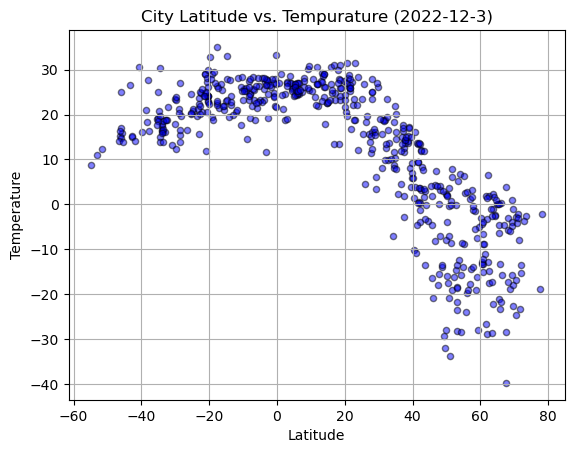

In [23]:
# Build the scatter plots for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp', alpha = .5, edgecolors='black', color = 'blue')


# Incorporate the other graph properties
plt.title("City Latitude vs. Tempurature (2022-12-3)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

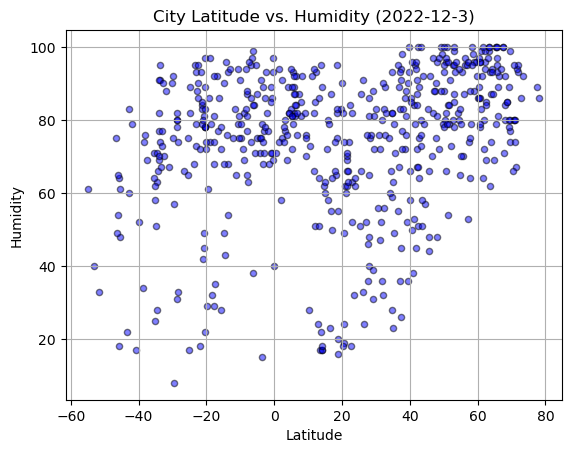

In [27]:
# Build scatter plot for latitude vs. humidity
city_data_df.plot.scatter('Lat','Humidity', alpha = .5, edgecolors='black', color = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-12-3)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

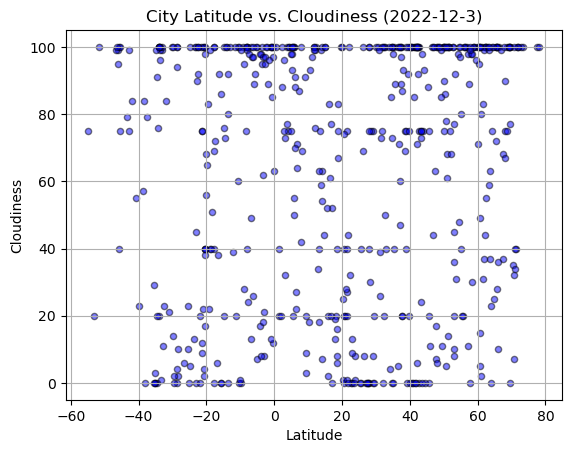

In [29]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat','Cloudiness', alpha = .5, edgecolors='black', color = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-12-3)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

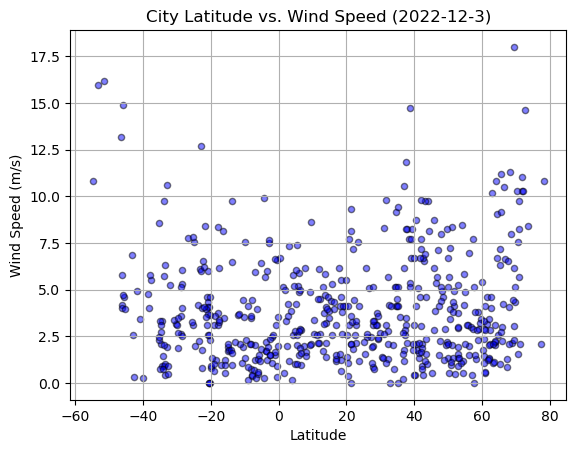

In [31]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat','Wind Speed', alpha = .5, edgecolors='black', color = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-12-3)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,13.69,84,100,1.34,US,1670100726
1,floro,61.5996,5.0328,1.98,64,31,4.63,NO,1670100729
3,saint-augustin,51.2260,-58.6502,0.68,84,100,8.34,CA,1670100735
5,marsabit,2.3284,37.9899,18.85,75,88,3.31,KE,1670100740
6,butaritari,3.0707,172.7902,27.30,77,32,7.33,KI,1670100742


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,namatanai,-3.6667,152.4333,27.20,79,95,2.17,PG,1670100733
4,mataura,-46.1927,168.8643,15.25,54,99,4.20,NZ,1670100492
8,itarema,-2.9248,-39.9167,26.63,77,8,7.48,BR,1670100747
9,codrington,-38.2667,141.9667,18.36,74,84,3.99,AU,1670100749
11,hithadhoo,-0.6000,73.0833,27.94,71,100,6.57,MV,1670100754


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8458805815348377


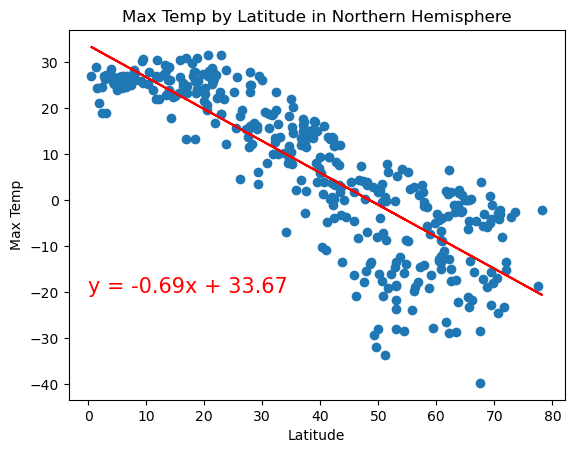

<Figure size 640x480 with 0 Axes>

In [75]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_max_temp = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_max_temp)
lin_r_values = north_lat * slope + intercept
print(f'The r-value is: {rvalue}')
Lin_r_Form = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Incorporate the other graph properties
plt.annotate(Lin_r_Form, (0, -20), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Max Temp by Latitude in Northern Hemisphere')
# Show plot
plt.scatter(north_lat, north_max_temp)
plt.plot(north_lat, lin_r_values, color= 'r')
plt.show()

The r-value is: 0.5701239122551639


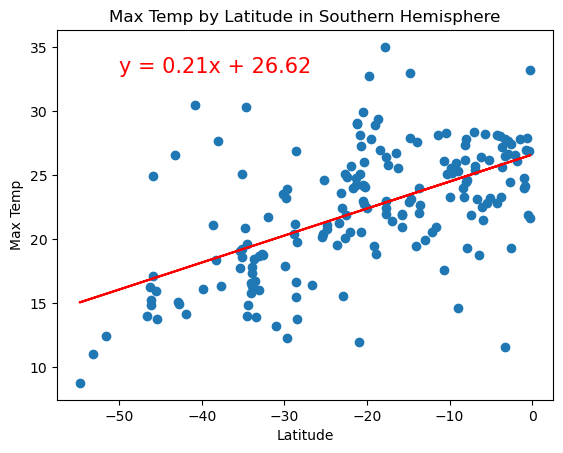

In [55]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_max_temp = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_max_temp)
lin_r_values = south_lat * slope + intercept
print(f'The r-value is: {rvalue}')
Lin_r_Form = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.annotate(Lin_r_Form, (-50, 33), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Max Temp by Latitude in Southern Hemisphere')

# Show plot
plt.scatter(south_lat, south_max_temp)
plt.plot(south_lat, lin_r_values, color= 'r')
plt.show()


**Discussion about the linear relationship:** There is a strong relationship between latitude and temperature in the northern hemisphere, and a weaker but still present relationship in the southern hemisphere. For both hemispheres the closer you are to the poles (the higher the latitude in absolute values) the lower the maximum temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3413607420870156


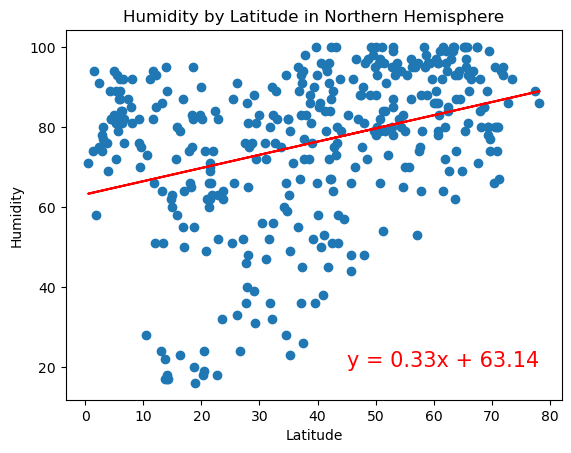

In [65]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_humidity = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humidity)
lin_r_values = north_lat * slope + intercept
print(f'The r-value is: {rvalue}')
Lin_r_Form = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Incorporate the other graph properties
plt.annotate(Lin_r_Form, (45,20), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by Latitude in Northern Hemisphere')

# Show plot
plt.scatter(north_lat, north_humidity)
plt.plot(north_lat, lin_r_values, color= 'r')
plt.show()


The r-value is: 0.33259731380014335


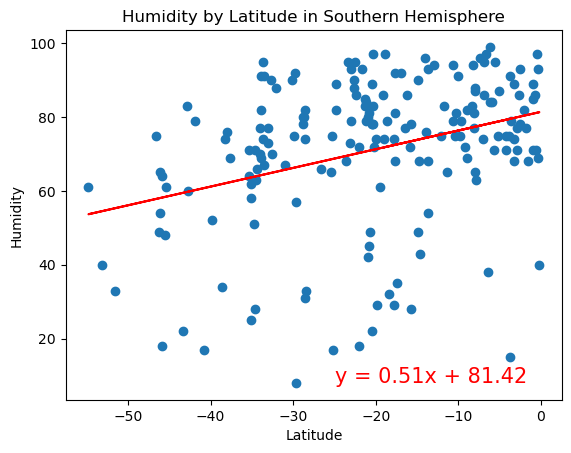

In [63]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_humidity = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humidity)
lin_r_values = south_lat * slope + intercept
print(f'The r-value is: {rvalue}')
Lin_r_Form = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.annotate(Lin_r_Form, (-25, 8), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by Latitude in Southern Hemisphere')


# Show plot
plt.scatter(south_lat, south_humidity)
plt.plot(south_lat, lin_r_values, color= 'r')
plt.show()


**Discussion about the linear relationship:** Humidity has a small positive correlation with latitude.In broad terms the further north you go the more humid it gets.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16279053308245464


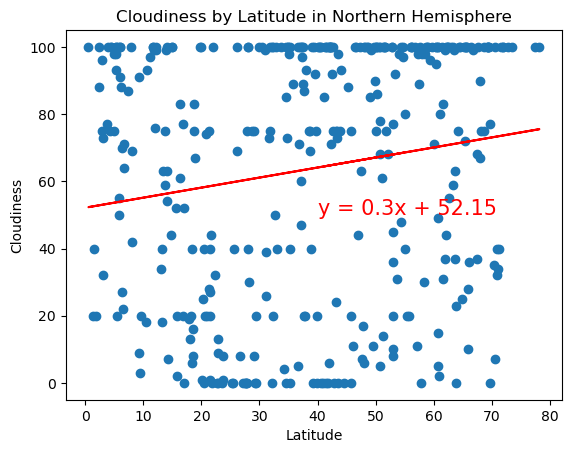

In [70]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_cloudiness = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloudiness)
lin_r_values = north_lat * slope + intercept
print(f'The r-value is: {rvalue}')
Lin_r_Form = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Incorporate the other graph properties
plt.annotate(Lin_r_Form, (40,50), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by Latitude in Northern Hemisphere')

# Show plot
plt.scatter(north_lat, north_cloudiness)
plt.plot(north_lat, lin_r_values, color= 'r')
plt.show()


The r-value is: 0.08202879368848556


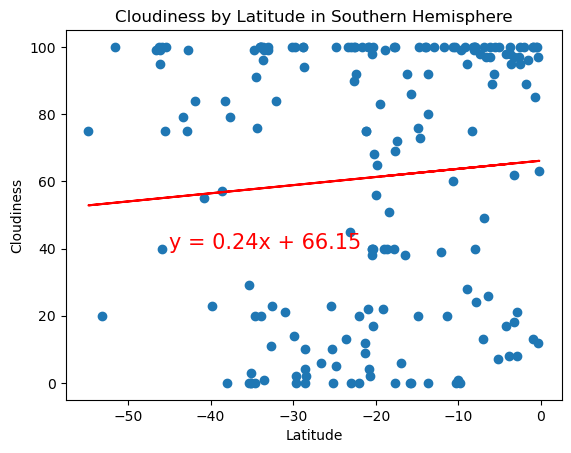

In [69]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_cloudiness = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloudiness)
lin_r_values = south_lat * slope + intercept
print(f'The r-value is: {rvalue}')
Lin_r_Form = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.annotate(Lin_r_Form, (-45, 40), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by Latitude in Southern Hemisphere')


# Show plot
plt.scatter(south_lat, south_cloudiness)
plt.plot(south_lat, lin_r_values, color= 'r')
plt.show()


**Discussion about the linear relationship:** There does not appear to be a correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1670745605169207


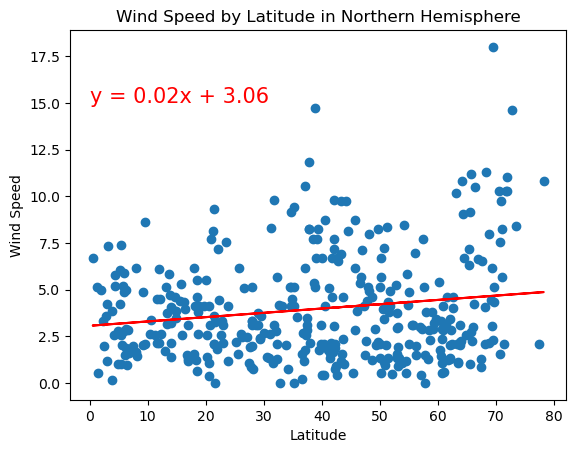

In [72]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_wind_speed = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind_speed)
lin_r_values = north_lat * slope + intercept
print(f'The r-value is: {rvalue}')
Lin_r_Form = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Incorporate the other graph properties
plt.annotate(Lin_r_Form, (0,15), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed by Latitude in Northern Hemisphere')

# Show plot
plt.scatter(north_lat, north_wind_speed)
plt.plot(north_lat, lin_r_values, color= 'r')
plt.show()


The r-value is: -0.34277782667779955


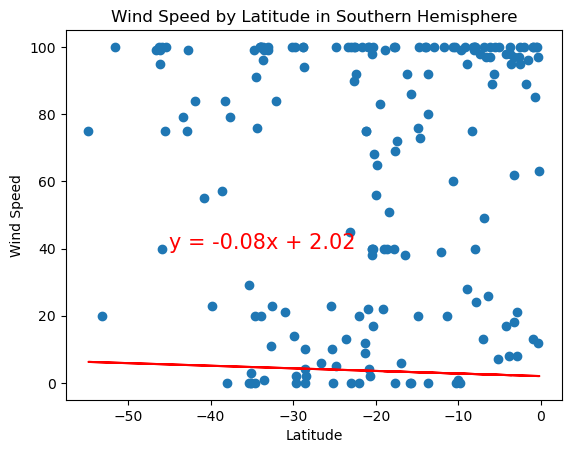

<Figure size 640x480 with 0 Axes>

In [74]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_wind_speed = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind_speed)
lin_r_values = south_lat * slope + intercept
print(f'The r-value is: {rvalue}')
Lin_r_Form = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.annotate(Lin_r_Form, (-45, 40), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed by Latitude in Southern Hemisphere')


# Show plot
plt.scatter(south_lat, south_cloudiness)
plt.plot(south_lat, lin_r_values, color= 'r')
plt.show()


**Discussion about the linear relationship:** There does not appear to be a relationship between wind speed and latitude